In [1]:
import os, sys
sys.path.append(os.getcwd()+"/../..")
sys.path.append(os.getcwd()+"/..")
from bit_flip_experiments import *
import pandas as pd
from utils import *
from game import *
import seaborn as sns
import matplotlib.pyplot as plt
from notebook_utils import *

In [2]:
# check we have computed lambdas for all
backends = []
for backend in backends_w_embs:
    f = open(DIR_PREFIX+f"lambdas1/{backend}.txt")
    lines = f.readlines()
    d = dict()
    for line in lines[1:]:
        elements = line.split(",")
        embedding_index = int(elements[0])
        if embedding_index not in d.keys():
            d[embedding_index] = []
        horizon = int(elements[1])
        d[embedding_index].append(horizon)
    
    expected_num_embedding = get_num_embeddings(backend, DIR_PREFIX + "lambdas/")
    if len(d.keys()) != expected_num_embedding:
        assert expected_num_embedding > len(d.keys())
        print(backend, f"expected embeddings {expected_num_embedding}, found: {len(d.keys())}")
    else:
        found = False
        for (k,v) in d.items():
            if len(v) != 4:
                found = True
                print(backend, f"{v}")
        if not found:
            backends.append(backend)
    f.close()

In [3]:
# check that for an horizon smaller than 7 we get lambdas of only 0.5
for backend in backends:
    f = open(DIR_PREFIX+f"lambdas1/{backend}.txt")
    lines = f.readlines()
    d = dict()
    for line in lines[1:]:
        elements = line.split(",")
        lambda_val = float(elements[2])
        horizon = int(elements[1])
        if horizon < 7:
            if not isclose(lambda_val, 0.5, abs_tol=0.00001):
                print(backend, line)
    
    f.close()

In [4]:
Precision.PRECISION = 10
Precision.update_threshold()
generate_all_lambdas_file("1")
# below is the function that generates the file that contains the different algorithms for each horizon
comments = get_different_algorithms_data(instruction_set="1", serialize_dump=False,custom_backends_w_embs=backends)

['fake_athens', 'fake_belem', 'fake_tenerife', 'fake_lima', 'fake_rome', 'fake_manila', 'fake_santiago', 'fake_bogota', 'fake_ourense', 'fake_yorktown', 'fake_essex', 'fake_vigo', 'fake_burlington', 'fake_quito', 'fake_london', 'fake_jakarta', 'fake_oslo', 'fake_perth', 'fake_lagos', 'fake_nairobi', 'fake_casablanca', 'fake_melbourne', 'fake_guadalupe', 'fake_tokyo', 'fake_poughkeepsie', 'fake_johannesburg', 'fake_boeblingen', 'fake_almaden', 'fake_singapore', 'fake_mumbai', 'fake_paris', 'fake_auckland', 'fake_kolkata', 'fake_toronto', 'fake_montreal', 'fake_sydney', 'fake_cairo', 'fake_hanoi', 'fake_geneva', 'fake_cambridge', 'fake_rochester', 'fake_brooklyn', 'fake_manhattan', 'fake_washington']


In [5]:
check_backends_vs_file(comments, exp_index="1") # this checks that the difference between the guarantees computed, and the simulator results

In [6]:
algs_union = dict()
algs_union[7] = dict()
algs_union[7][0] = 0
algs_union[7][1] = 1
algs_union[7][2] = 2
algs_union[7][3] = 3

# Horizon 7

In [67]:
df7 = get_horizon_df(7, comments, instruction_set="1")

In [68]:
result = get_df_horizon_describe(df7)
# result.to_csv(DIR_PREFIX + "analysis_results/h7_programs.csv")
result

value                                                 \
                         count      mean       std     min       25%      50%   
program variable                                                                
0       accum_prob        78.0  0.943237  0.083127  0.5975  0.942375  0.97500   
        couplers_success  78.0  0.977090  0.016628  0.9160  0.971875  0.98200   
        success0          78.0  0.952449  0.098813  0.3520  0.971000  0.98550   
        success1          78.0  0.934026  0.095789  0.3410  0.931500  0.96500   
        success_diff      78.0  0.018423  0.101186 -0.5180  0.007250  0.01800   
1       accum_prob        84.0  0.950696  0.058113  0.7075  0.945750  0.97250   
        couplers_success  84.0  0.975708  0.020003  0.8920  0.971625  0.98275   
        success0          84.0  0.962679  0.061552  0.6930  0.958250  0.98700   
        success1          84.0  0.938714  0.071607  0.5010  0.923000  0.96200   
        success_diff      84.0  0.023964  0.065758 -0.1600  0.002000  0.01400   
2       accum_prob        57.0  0.942491  0.057240  0.7255  0.917500  0.96600   
        couplers_success  57.0  0.974009  0.018234  0.9060  0.964000  0.97900   
        success0          57.0  0.950614  0.067097  0.6850  0.931000  0.98000   
        success1          57.0  0.934368  0.065774  0.6980  0.910000  0.95800   
        success_diff      57.0  0.016246  0.067462 -0.2330  0.000000  0.01300   
3       accum_prob         6.0  0.743917  0.172539  0.5965  0.599875  0.68250   
        couplers_success   6.0  0.317417  0.246115  0.0000  0.114125  0.46675   
        success0           6.0  0.879667  0.093844  0.7190  0.841000  0.93400   
        success1           6.0  0.608167  0.338229  0.2590  0.296750  0.60050   
        success_diff       6.0  0.271500  0.356837 -0.0720 -0.037250  0.20050   

                                            
                               75%     max  
program variable                            
0       accum_prob        0.985375  0.9965  
        couplers_success  0.988500  0.9930  
        success0          0.992000  0.9980  
        success1          0.979750  0.9950  
        success_diff      0.025750  0.5130  
1       accum_prob        0.984750  0.9970  
        couplers_success  0.989125  0.9935  
        success0          0.993250  0.9980  
        success1          0.981250  0.9960  
        success_diff      0.029250  0.4130  
2       accum_prob        0.983000  0.9930  
        couplers_success  0.989000  0.9940  
        success0          0.991000  0.9980  
        success1          0.982000  0.9900  
        success_diff      0.032000  0.2580  
3       accum_prob        0.897875  0.9600  
        couplers_success  0.480000  0.4900  
        success0          0.934750  0.9460  
        success1          0.906500  0.9850  
        success_diff      0.606250  0.6750

In [7]:
for i in range(get_num_algorithms(7, instruction_set="1")):
    get_similar_algorithms(7, i, instruction_set="1")
    print("-----------")
    print()

difference of algorithm=0 at horizon=7
diff with alg. 0: max=0.0 min=0.0 std=0.0 avg=0.0
diff with alg. 1: max=6.921781945057326e-06 min=0.0 std=1.4216089685158323e-06 avg=1.8378286097103175e-06
diff with alg. 2: max=2.979852686602058e-06 min=0.0 std=7.0292875434794e-07 avg=9.437511976380838e-07
diff with alg. 3: max=0.06232538737192739 min=0.00015956526738342136 std=0.01004311838599913 avg=0.013146338531560182
-----------

difference of algorithm=1 at horizon=7
diff with alg. 0: max=6.921781945057326e-06 min=0.0 std=1.4216089685158323e-06 avg=1.8378286097103175e-06
diff with alg. 1: max=0.0 min=0.0 std=0.0 avg=0.0
diff with alg. 2: max=3.999995999981465e-06 min=0.0 std=8.75027591066454e-07 avg=9.660348786096524e-07
diff with alg. 3: max=0.062328223677558525 min=0.0001545720705503073 std=0.010043293833906187 avg=0.013146361348728878
-----------

difference of algorithm=2 at horizon=7
diff with alg. 0: max=2.979852686602058e-06 min=0.0 std=7.0292875434794e-07 avg=9.437511976380838e-07
d

In [10]:
def get_hardware_diff(backend, alg1, alg2):
    assert isinstance(backend, str)
    assert isinstance(alg1, int)
    assert isinstance(alg2, int)
    f = open(DIR_PREFIX + "analysis_results1/backends_vs.csv")
    lines = f.readlines()[1:]
    vals = []
    for line_ in lines:
        line = line_.split(",")
        horizon = int(line[0])
        if horizon == 7:
        
            alg = int(line[1])
            real_hardware = line[2]

            acc = float(line[3])
            if real_hardware == backend:
                if alg == alg1 or alg == alg2:
                    vals.append(acc)
    assert len(vals) == 2
    return abs(vals[0] - vals[1])
    f.close()
    
def get_tuples_diffs(alg_index1, alg_index2):
    answer = []
    for backend in backends:
        num_embeddings = get_num_embeddings(backend, DIR_PREFIX + "lambdas/")
        for emb_index in range(num_embeddings):
            embedding = f"{backend}{emb_index}"
            diff = get_hardware_diff(embedding, alg_index1, alg_index2)

            answer.append((embedding, diff))

    answer = sorted(answer, key=lambda x : x[1], reverse=True)
    return answer
    

In [11]:
get_tuples_diffs(0, 1)[:3]

[('fake_quito2', 6.921781945057326e-06),
 ('fake_guadalupe0', 5.991751325429284e-06),
 ('fake_cairo1', 5.986012862502221e-06)]

In [12]:
get_tuples_diffs(0, 2)[:10]

[('fake_lagos3', 2.979852686602058e-06),
 ('fake_guadalupe0', 2.9786442080625974e-06),
 ('fake_cairo1', 2.9628521293068033e-06),
 ('fake_quito2', 2.921785945075861e-06),
 ('fake_tenerife1', 2.8991519961385492e-06),
 ('fake_melbourne4', 2.0000060000358033e-06),
 ('fake_guadalupe1', 2.000005999924781e-06),
 ('fake_toronto2', 2.0000039999690244e-06),
 ('fake_cairo2', 2.0000000000575113e-06),
 ('fake_almaden6', 1.9999979999907325e-06)]

In [13]:
get_tuples_diffs(0, 3)[:10]

[('fake_toronto5', 0.06232538737192739),
 ('fake_bogota1', 0.04417745576161625),
 ('fake_rochester0', 0.04393854368357786),
 ('fake_bogota2', 0.04389263000231991),
 ('fake_cambridge1', 0.040909394275845834),
 ('fake_cambridge3', 0.039523746877419885),
 ('fake_poughkeepsie4', 0.03744327387264523),
 ('fake_poughkeepsie2', 0.037380464568174565),
 ('fake_tokyo2', 0.03730062243550325),
 ('fake_almaden7', 0.036782113086421986)]

In [14]:
get_tuples_diffs(2, 3)[:10]

[('fake_toronto5', 0.062326275744725046),
 ('fake_bogota1', 0.04417745576161625),
 ('fake_rochester0', 0.04393764939612543),
 ('fake_bogota2', 0.043893687865148356),
 ('fake_cambridge1', 0.04091047554160632),
 ('fake_cambridge3', 0.039523746877419885),
 ('fake_poughkeepsie4', 0.03744413206730168),
 ('fake_poughkeepsie2', 0.037380464568174565),
 ('fake_tokyo2', 0.037299715267931854),
 ('fake_almaden7', 0.03678301817560403)]

# Visualizing Lambdas

In [24]:
df = pd.read_csv(DIR_PREFIX + "analysis_results1/all_lambdas.csv")

In [25]:
df['hardware'] = df['hardware_spec'] + df['embedding'].astype(str)
df

,Unnamed: 0,hardware_spec,embedding,horizon,lambda,hardware
0,0,fake_athens,0,4,0.500006,fake_athens0
1,1,fake_athens,0,5,0.500008,fake_athens0
2,2,fake_athens,0,6,0.981302,fake_athens0
3,3,fake_athens,0,7,0.981303,fake_athens0
4,4,fake_athens,1,4,0.500006,fake_athens1
...,...,...,...,...,...,...
895,895,fake_washington,5,7,0.877941,fake_washington5
896,896,fake_washington,6,4,0.500002,fake_washington6
897,897,fake_washington,6,5,0.500002,fake_washington6
898,898,fake_washington,6,6,0.977935,fake_washington6


In [4]:
# sns.set(rc={'figure.figsize':(5,100)})
# sns.barplot(df, y="hardware", x="lambda", hue="horizon")



There is nothing new at horizon 7 with respect to horizon 6

# Plots for Main Paper

In [22]:
from matplotlib.colors import to_rgba
TRAD_COLOR = "#1E4CF3"
ALGO0_COLOR = "#D13929"
ALGO1_COLOR = "#EF8A3F"
ALGO2_COLOR = "#006064"
ALGO3_COLOR = "#6d4c41"
OTHER_COLOR = "#EF8A3F"
TRAD_COLOR_W_ALPHA = to_rgba("#1E4CF3", 0.1)

In [36]:
custom_backends = ["fake_cambridge2", "fake_rochester3", "fake_rochester4", "fake_manhattan1"]
df_traditional = get_traditional_df(take_best=TAKE_BEST, max_horizon=8, target_backends=custom_backends)
df_traditional = df_traditional[df_traditional.horizon==7]
df_best7_0 = get_df_plots({7:0}, take_best=TAKE_BEST, instruction_set="1", target_backends=custom_backends)
# df_best7_1 = get_df_plots({7:0}, take_best=TAKE_BEST, instruction_set="1", target_backends=custom_backends)
df_best7_3 = get_df_plots({7:3}, take_best=TAKE_BEST, instruction_set="1", target_backends=custom_backends)

In [37]:
df_traditional['algorithm']  = 'Traditional'
df_best7_0['algorithm'] = 'Algorithm 0'
# df_best7_1['algorithm'] = 'Algorithm 1'
df_best7_3['algorithm'] = 'Algorithm 3'

In [38]:
all_dfs = pd.concat([df_traditional, df_best7_0, df_best7_3])

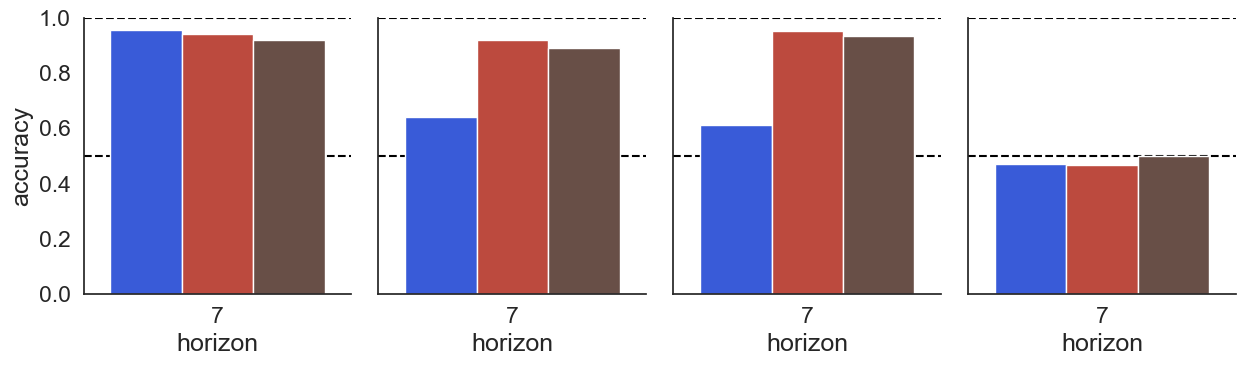

In [40]:
import matplotlib.pyplot as plt
sns.set_theme(style="white", font_scale=1.5)
hue_order = ['Traditional', 'Algorithm 0', 'Algorithm 3']
g = sns.catplot(
    all_dfs, kind="bar",
    col="hardware_spec", y="accuracy", x="horizon", 
    height=4, aspect=.8, hue="algorithm",legend=False, palette=[TRAD_COLOR, ALGO0_COLOR, ALGO3_COLOR], hue_order=hue_order)
plt.ylim(0, 1.0)
# g.set(xticklabels=[])
# g.set(xlabel=None)
g.set_titles("")
# g.set_titles(template='{col_name}')
# sns.move_legend(g, "center")
# g._legend.set_title("")

# g.despine(left=True)
# plt.legend(loc='upper right')

# iterate through axes
# for ax in g.axes.ravel():
    
#     # add annotations
#     for c in ax.containers:
#         labels = [f'{v.get_height()}' for v in c]
#         ax.bar_label(c, labels=labels, label_type='edge')
#     ax.margins(y=0.2)
g.refline(y=0.5, color='black', zorder=0)
g.refline(y=1.0, color='black', zorder=0)
plt.savefig(DIR_PREFIX+"/analysis_results1/all_hardwares.png", format='png')

# Visualizing all Accuracies

In [19]:
is_main = False # toggle 
df, horizon_lines = get_df_visualizing_lambdas(comments, algs_union, filter_out_non_advantage=is_main, take_best=TAKE_BEST,instruction_set="1")

if is_main:
    sns.set(rc={'figure.figsize':(10,8)},style="white",font_scale=2) # for main paper
else:
    sns.set(rc={'figure.figsize':(15,10)},style="white",font_scale=1.5)
    
only_trad_df, _ = get_df_visualizing_lambdas(comments, algs_union, filter_out_non_advantage=False, take_best=TAKE_BEST,instruction_set="1", get_only_trad=True)

In [20]:
import random
import copy

if is_main:
    df2 = pd.concat([only_trad_df, df])
else:
    df2 = df
hardware_order = copy.deepcopy(df2['hardware_spec'].values)
random.Random(5).shuffle(hardware_order)

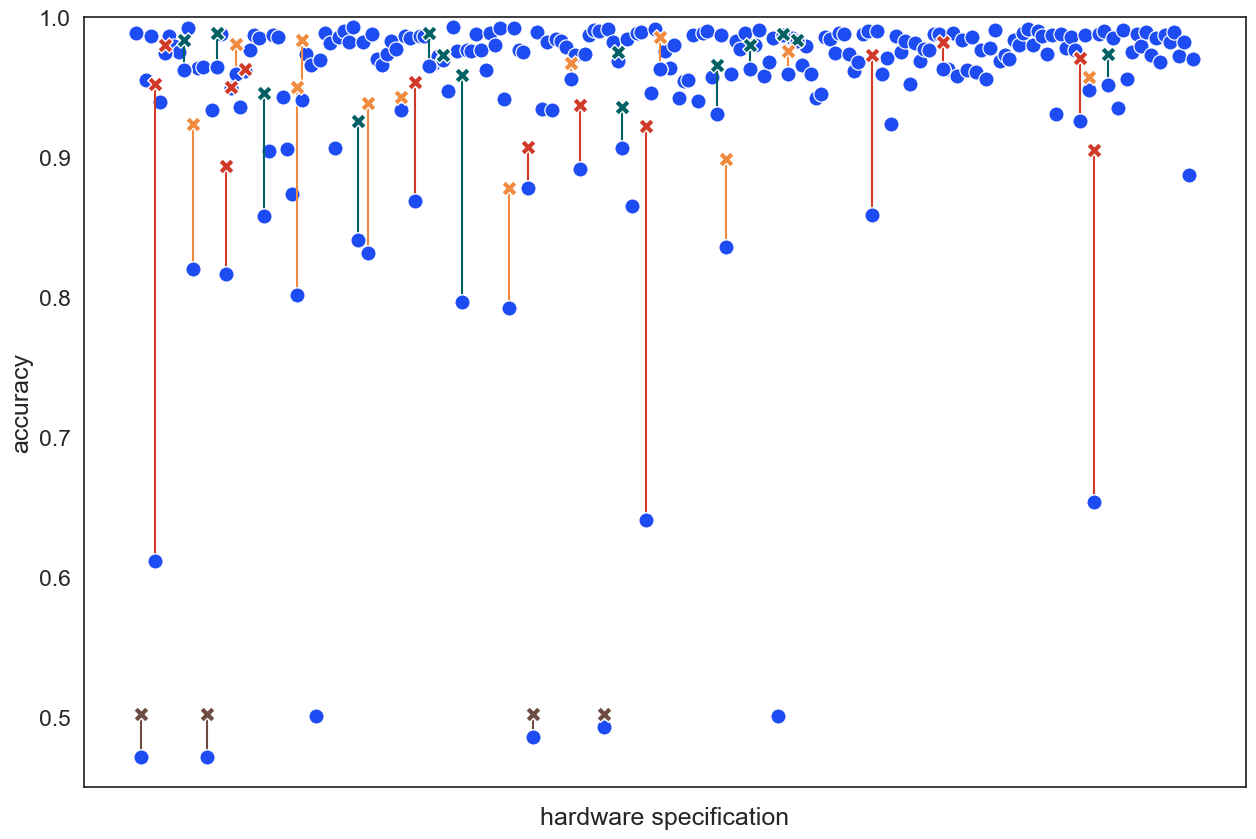

In [23]:
# TRAD_COLOR_W_ALPHA = to_rgba("#1E4CF3", 0.2)

TRAD_COLOR_W_ALPHA = to_rgba("#1E4CF3", 0.2)
if is_main:
    new_palette = [TRAD_COLOR, ALGO0_COLOR, OTHER_COLOR, OTHER_COLOR, ALGO3_COLOR,TRAD_COLOR_W_ALPHA]
else:
    new_palette = [TRAD_COLOR, ALGO0_COLOR, ALGO1_COLOR, ALGO2_COLOR, ALGO3_COLOR,TRAD_COLOR_W_ALPHA]
hue_order = [0, 1, 2, 3,4,-1]
colors_m = {
    0:0,
    1:1,
    2:2,
    3:3,
    4:4,
    -1:4
}

current_df = df2[df2.horizon==7]
for h in hardware_order:
    h_df= current_df[current_df.hardware_spec == h ]
    if h_df.shape[0] == 1:
        z_order = 1
        g = sns.scatterplot(data=h_df, x="hardware_spec", y="accuracy", hue="alg_class", 
                            style="program_type", legend=False, hue_order=hue_order, 
                            palette=new_palette, s=120, zorder=z_order, style_order=["trad", "new"])
    else:
        
        z_order = 4
        g = sns.scatterplot(data=h_df[h_df.program_type == "new"], x="hardware_spec", y="accuracy", hue="alg_class", 
                            style="program_type", legend=False, hue_order=hue_order, 
                            palette=new_palette, s=120, zorder=z_order, style_order=["trad", "new"])
        
        z_order = 3
        g = sns.scatterplot(data=h_df[h_df.program_type == "trad"], x="hardware_spec", y="accuracy", hue="alg_class", 
                            style="program_type", legend=False, hue_order=hue_order, 
                            palette=new_palette, s=120, zorder=z_order, style_order=["trad", "new"])
        

# g.set(xticklabels=[])
# g.set(xlabel="hardware specification")
# g.tick_params(left=True) 

for line in horizon_lines[7]:
    x = line[0]
    ymin = line[1]
    ymax = line[2]
    color = new_palette[colors_m[line[3]]]
    g.vlines([x], ymin, ymax, colors=color, zorder=2)

g.set(xticklabels=[])
g.set(xlabel="hardware specification")
# g.tick_params(bottom=True) 
plt.ylim(0.45, 1.0)
if is_main:
    g.set(ylabel=None)
    plt.ylim(0.45, 1.0)
    plt.savefig(DIR_PREFIX+"/images/horizon6_I1_main.pdf", format='pdf')
else:
    plt.savefig(DIR_PREFIX+"/images/horizon6_I1.pdf", format='pdf')



In [38]:
def filter_horizon_lines(alg_index):
    real_alg_index = alg_index + 1
    lines = horizon_lines[7]
    
    result = []
    for line in lines:
        if line[3] == real_alg_index:
            result.append(line)
        
    return result

In [39]:
def get_highest_gain_per_alg(alg_index):
    lines = filter_horizon_lines(alg_index)
    current_max = -1
    current_max_backend = None
    for line in lines:
        diff = line[2] - line[1]
        if current_max_backend is None:
            current_max = diff
            current_max_backend = [line[0]]
        elif diff == current_max:
            current_max_backend.append(line[0])
        elif diff > current_max:
            current_max = diff
            current_max_backend = [line[0]]
    return current_max, current_max_backend

In [40]:
get_highest_gain_per_alg(0)

(0.3406830519500944, ['fake_cambridge2'])

In [41]:
get_highest_gain_per_alg(1)

(-1, None)

In [42]:
get_highest_gain_per_alg(2)

(-1, None)

In [43]:
get_highest_gain_per_alg(3)

(0.030510214959453275, ['fake_manhattan1'])

In [61]:
def get_highest_advantage(lines, alg_indexes, top=1):
    filtered_lines = []
    for line in lines:
        if line[3]-1 in alg_indexes:
            
            filtered_lines.append(line)
    answer =  sorted(filtered_lines, key=lambda x : (x[2] - x[1]), reverse=True )
    return answer[:top]

In [63]:
get_highest_advantage(horizon_lines[7], [0,1,2], top=100)

[('fake_cambridge2', 0.6113169480499056, 0.952, 1),
 ('fake_rochester4', 0.640760804905313, 0.922, 1),
 ('fake_rochester2', 0.6538982482801222, 0.905, 1),
 ('fake_toronto4', 0.7962682093956078, 0.959, 3),
 ('fake_yorktown5', 0.8012770138281944, 0.95, 2),
 ('fake_paris0', 0.8589775483750006, 0.973, 1),
 ('fake_almaden5', 0.8313017070257659, 0.939, 2),
 ('fake_almaden4', 0.8200360311030283, 0.924, 2),
 ('fake_rochester1', 0.8579709821090199, 0.946, 3),
 ('fake_washington5', 0.7924928656604843, 0.878, 2),
 ('fake_johannesburg0', 0.8689188747834775, 0.954, 1),
 ('fake_melbourne3', 0.8412151861786382, 0.926, 3),
 ('fake_rochester0', 0.8169117706738163, 0.894, 1),
 ('fake_tenerife1', 0.836247454290517, 0.899, 2),
 ('fake_geneva0', 0.9256805763276235, 0.971, 1),
 ('fake_manhattan3', 0.8918454136354634, 0.937, 1),
 ('fake_auckland0', 0.9407695609643301, 0.984, 2),
 ('fake_paris4', 0.9311069975976706, 0.966, 3),
 ('fake_tokyo3', 0.9064827410412738, 0.936, 3),
 ('fake_tokyo2', 0.8778065813196854

In [64]:
0.9518783825094691-0.974

-0.022121617490530876

In [41]:
get_highest_advantage(horizon_lines[7], [3], top=10)

[('fake_manhattan1', 0.4714897850405467, 0.502, 4),
 ('fake_manhattan0', 0.47152634445610947, 0.502, 4),
 ('fake_washington4', 0.48570711692346175, 0.502, 4),
 ('fake_cambridge0', 0.49303842164342904, 0.502, 4)]

In [19]:
0.502-0.4715

0.030500000000000027

In [7]:
df = get_trad_new_algo_stats(comments, take_best=True)
get_df_horizon_describe(df)

value                                          \
                          count      mean       std       min       25%   
program variable                                                          
0       accum_prob        182.0  0.965071  0.047211  0.596300  0.961350   
        couplers_success  182.0  0.966101  0.103635  0.000000  0.970851   
        success0          182.0  0.981655  0.017644  0.904000  0.977200   
        success1          182.0  0.948487  0.084962  0.259000  0.945000   
        success_diff      182.0  0.033168  0.078385 -0.049200  0.003800   
1       accum_prob         13.0  0.800644  0.119680  0.597500  0.788900   
        couplers_success   13.0  0.963613  0.021761  0.922620  0.947084   
        success0           13.0  0.790862  0.167088  0.352000  0.708200   
        success1           13.0  0.810427  0.169181  0.341250  0.815000   
        success_diff       13.0 -0.019565  0.236195 -0.518000 -0.115000   
2       accum_prob         12.0  0.833468  0.068406  0.707700  0.773333   
        couplers_success   12.0  0.967403  0.022447  0.923507  0.958282   
        success0           12.0  0.843626  0.093840  0.693333  0.775112   
        success1           12.0  0.823310  0.112262  0.501400  0.793012   
        success_diff       12.0  0.020317  0.155242 -0.160000 -0.076950   
3       accum_prob         14.0  0.878016  0.067614  0.725500  0.830450   
        couplers_success   14.0  0.980668  0.013450  0.948648  0.975936   
        success0           14.0  0.867029  0.088067  0.685000  0.827200   
        success1           14.0  0.889004  0.081700  0.706000  0.867750   
        success_diff       14.0 -0.021975  0.102834 -0.232800 -0.061600   
4       accum_prob          4.0  0.817625  0.166986  0.610000  0.718750   
        couplers_success    4.0  0.475902  0.014176  0.456252  0.471688   
        success0            4.0  0.852550  0.108190  0.719200  0.787300   
        success1            4.0  0.782700  0.262174  0.410000  0.695600   
        success_diff        4.0  0.069850  0.222134 -0.071600 -0.054800   

                                                        
                               50%       75%       max  
program variable                                        
0       accum_prob        0.977750  0.986100  0.997200  
        couplers_success  0.982074  0.988756  0.993753  
        success0          0.988200  0.993600  0.998200  
        success1          0.969700  0.982600  0.996400  
        success_diff      0.017100  0.032750  0.674600  
1       accum_prob        0.827300  0.903300  0.930700  
        couplers_success  0.969650  0.978920  0.989136  
        success0          0.853750  0.916000  0.937200  
        success1          0.870000  0.913000  0.946400  
        success_diff      0.000000  0.017600  0.512500  
2       accum_prob        0.868100  0.884800  0.917500  
        couplers_success  0.970402  0.985966  0.992466  
        success0          0.885100  0.908400  0.956200  
        success1          0.857167  0.862025  0.964000  
        success_diff      0.005600  0.047200  0.412600  
3       accum_prob        0.897950  0.920725  0.955900  
        couplers_success  0.983881  0.990734  0.993877  
        success0          0.898500  0.926950  0.954200  
        success1          0.906400  0.950850  0.981600  
        success_diff     -0.002000  0.008450  0.210000  
4       accum_prob        0.850250  0.949125  0.960000  
        couplers_success  0.478795  0.483009  0.489769  
        success0          0.872700  0.937950  0.945600  
        success1          0.868100  0.955200  0.984600  
        success_diff     -0.024500  0.100150  0.400000

In [15]:
df, horizon_lines = get_df_visualizing_lambdas(comments, algs_union, only_own_alg=True, take_best=True, instruction_set="1")
sns.set(rc={'figure.figsize':(20,30)},style="whitegrid",font_scale=2.5)

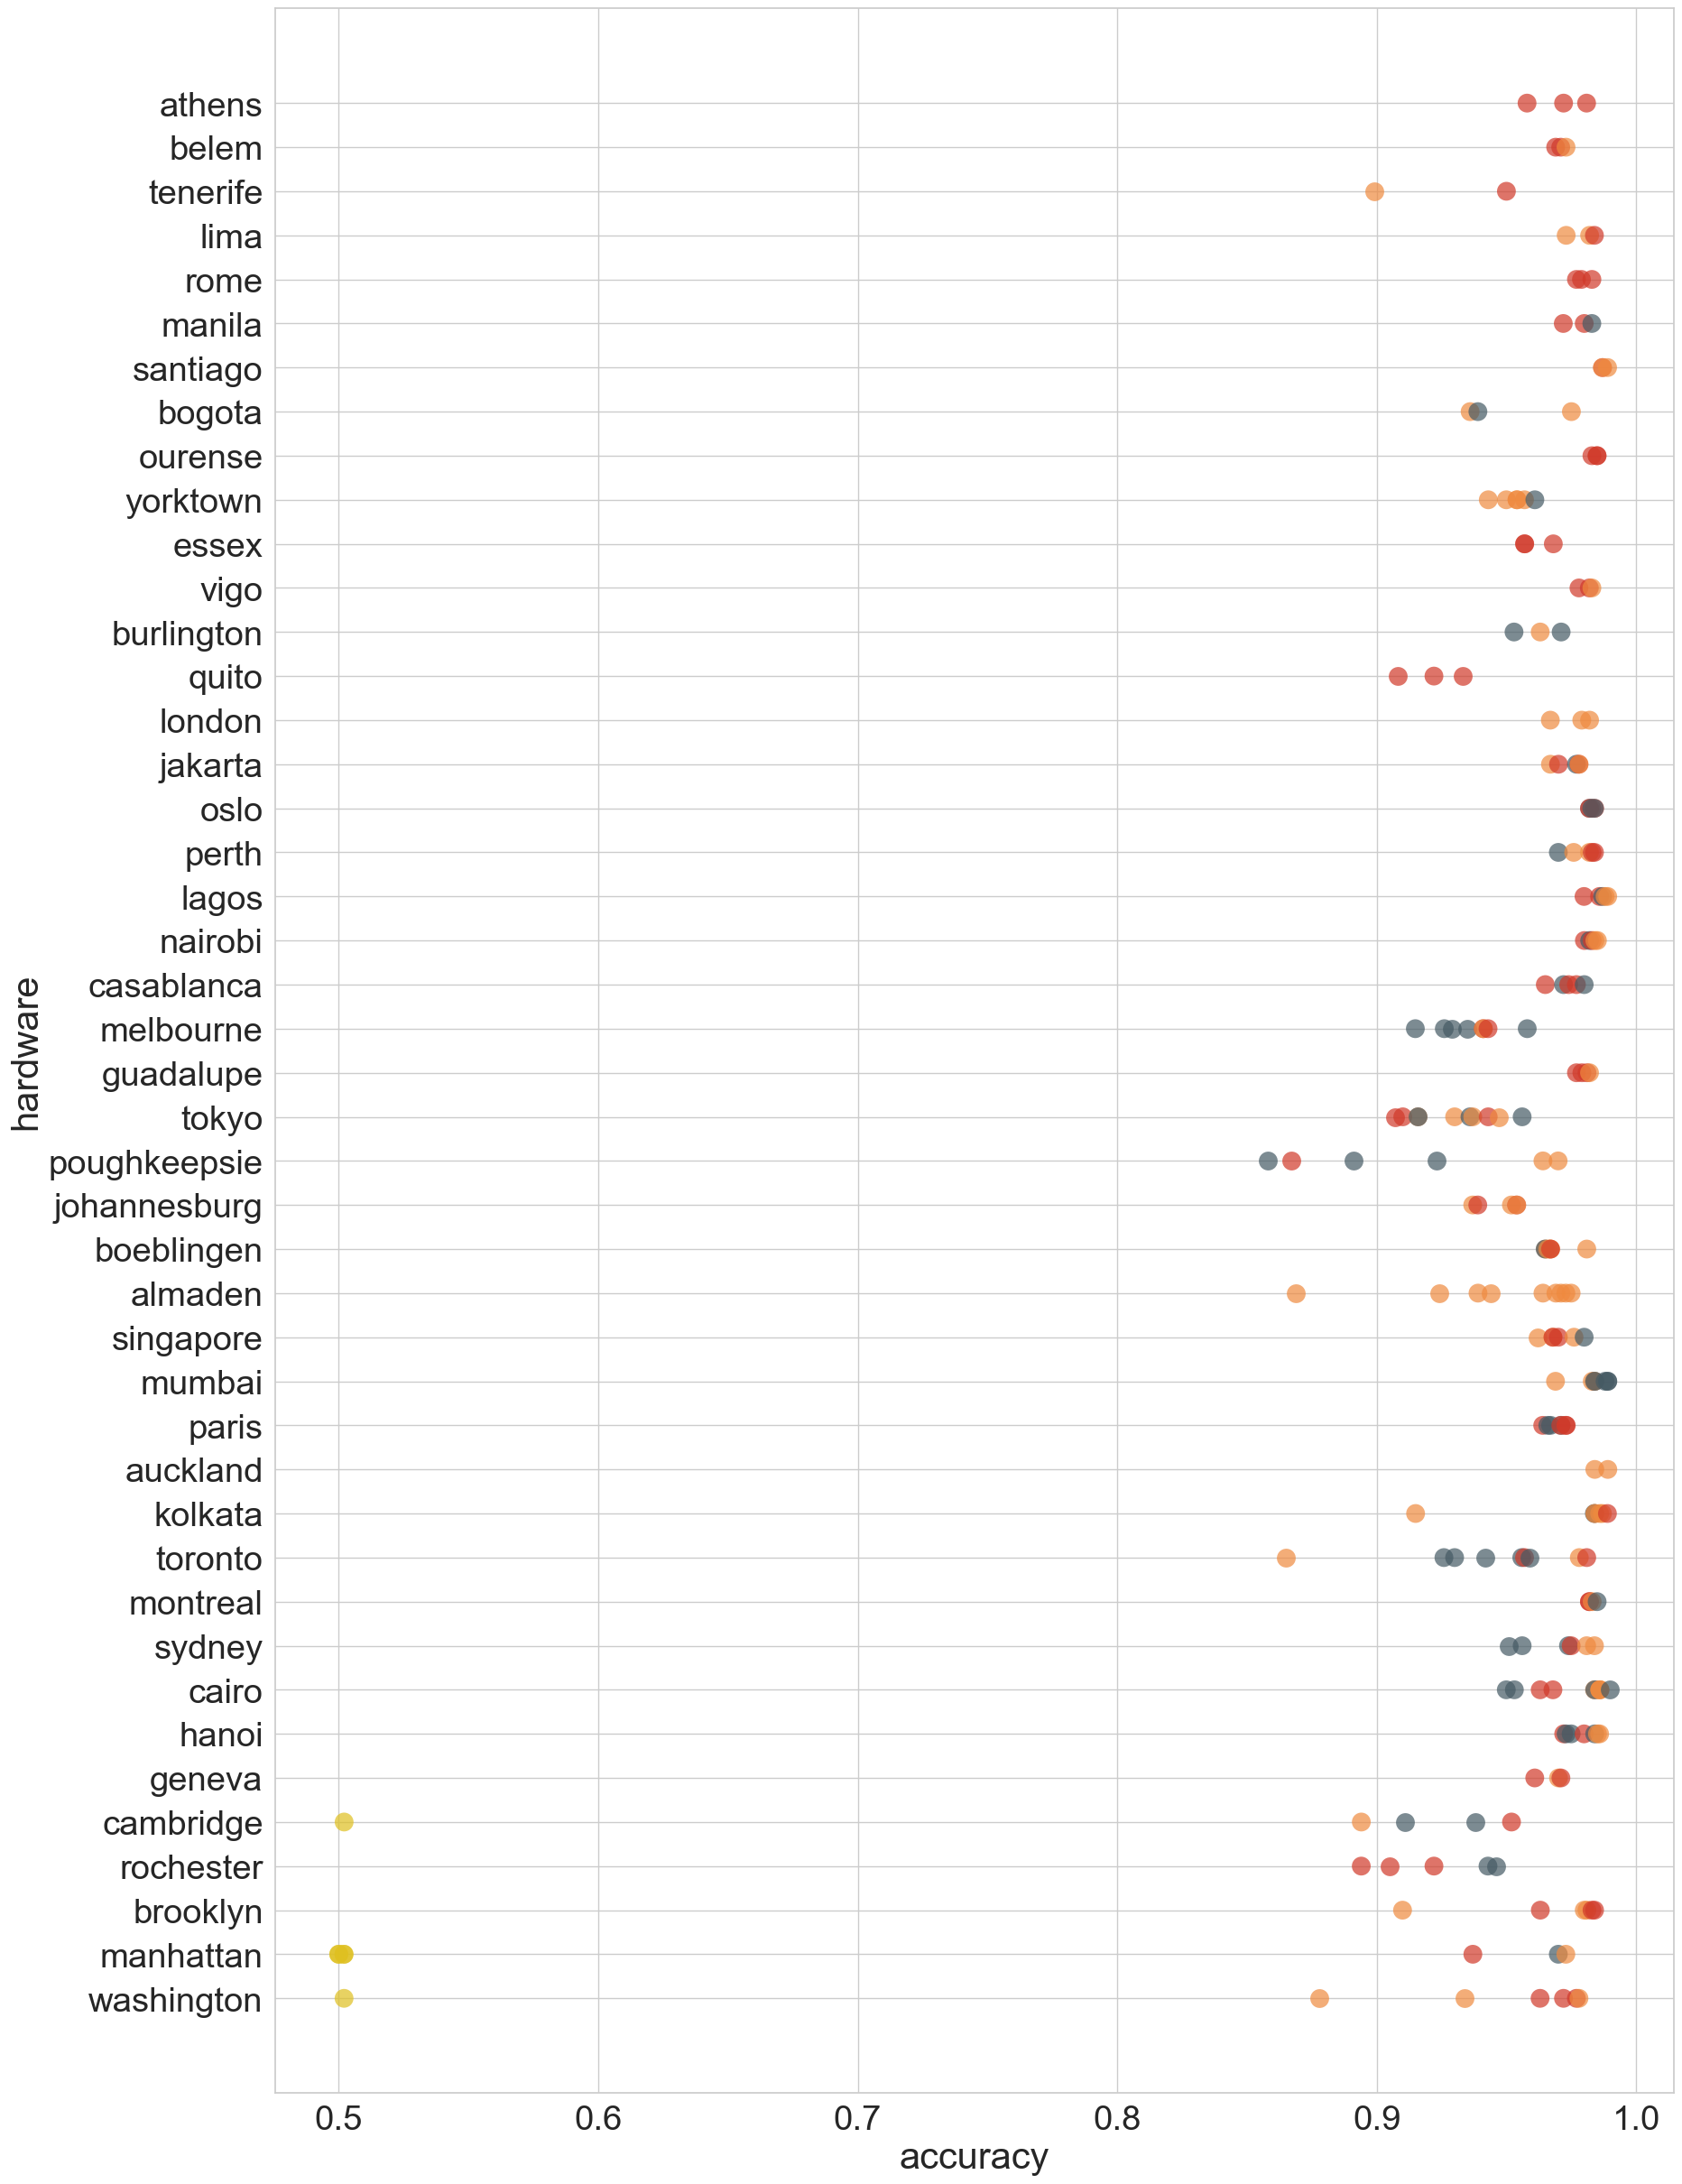

In [18]:
new_palette = [ALGO0_COLOR, ALGO1_COLOR, ALGO2_COLOR, ALGO3_COLOR]
hue_order = [0, 1, 2, 3]
assert len(new_palette) == len(hue_order)
sns.stripplot(data=df[df.horizon == 7], x="accuracy", y="hardware", hue="alg_class", palette=new_palette,native_scale=True, orient="v", legend=False, s=15, alpha=0.7,  hue_order=hue_order)
plt.savefig(DIR_PREFIX+"/images/h7_per_hardware_algs_I1.pdf", format='pdf')

In [47]:
df = get_backend_properties_df(FAKE_ROCHESTER)
df.to_csv("./rochester.csv")

In [44]:
df = get_backend_properties_df(FAKE_TORONTO)
df.to_csv("./toronto.csv")

In [46]:
df = get_backend_properties_df(FAKE_YORKTOWN)
df.to_csv("./yorktown.csv")

In [27]:
df = get_backend_properties_df(FAKE_CAMBRIDGE)
df.to_csv("./cambridge.csv")

In [26]:
df = get_backend_properties_df(FAKE_MANHATTAN)
df.to_csv("./manhattan.csv")